# **Task 3: Natural Language Processing (NLP) - Sentiment Analysis**

**Objectives**

- Preprocess text data (tokenization, removing
stopwords, and stemming/lemmatization).

- Use nltk or TextBlob for sentiment analysis.

- Visualize the sentiment distribution and word
frequencies using word clouds.

### **1. Load Data**

In [1]:
import pandas as pd

tweets = pd.read_csv('D:\Codveda-Technologies\Level 3\Tweets.csv')

print(tweets.head())
print(tweets.columns)

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

### **2. Baic Text Cleaning**

Remove: 
 - URLs
 - Mentions
 - Hashtags
 - Punctuation
 - Lowercasing

In [2]:
import re

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', "", text)       # Remove URLs
    text = re.sub(r'@\w+', "", text)          # Remove mentions
    text = re.sub(r'#\w+', "", text)          # Remove hashtags
    text = re.sub(r'[^a-z\s]', "", text)      # keep only letters
    text = re.sub(r'\s+', " ", text).strip()  # Remove extra spaces
    return text

tweets['cleaned_text'] = tweets['text'].apply(clean_text)
print(tweets['cleaned_text'].head())

0                                            what said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: cleaned_text, dtype: object


### **3. Tokenization, Stopwords, and Lemmatization**

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Gunjan
[nltk_data]     Kothari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gunjan
[nltk_data]     Kothari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gunjan
[nltk_data]     Kothari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Gunjan
[nltk_data]     Kothari\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

tweets["processed_text"] = tweets["cleaned_text"].apply(preprocess_text)
print(tweets["processed_text"].head())

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: processed_text, dtype: object


### **4. Sentiment Analysis (TextBlob)**

We'll calculate polarity:

 - Positive -> Polarity > 0

 - Neutral -> Polarity == 0

 - Negative -> Polarity < 0 

In [5]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"
    
tweets["sentiment"] = tweets["processed_text"].apply(get_sentiment)
print(tweets["sentiment"].value_counts())

sentiment
Neutral     5981
Positive    5342
Negative    3317
Name: count, dtype: int64


### **5. Visualize Sentiment Distribution**

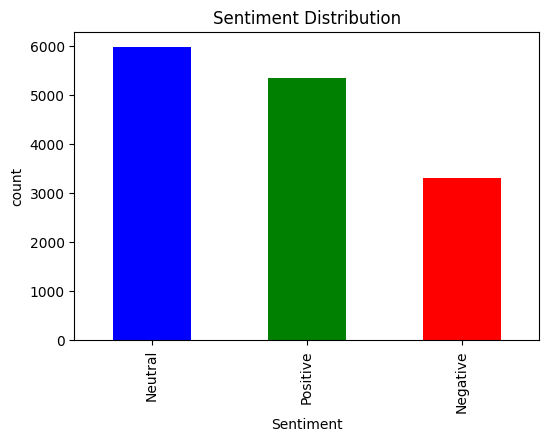

In [12]:
import matplotlib.pyplot as plt

sent_counts = tweets['sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sent_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution')     
plt.xlabel('Sentiment')
plt.ylabel(sent_counts.name)

plt.show()

### **6. Word Cloud**

For Positive Tweets

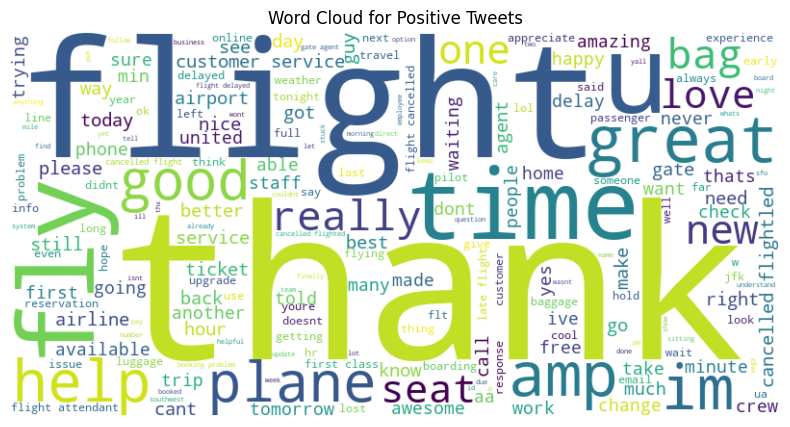

In [ ]:
from wordcloud import WordCloud

positive_tweets = tweets[tweets['sentiment'] == 'Positive']
positive_text = " ".join(positive_tweets['processed_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


For Negative tweets

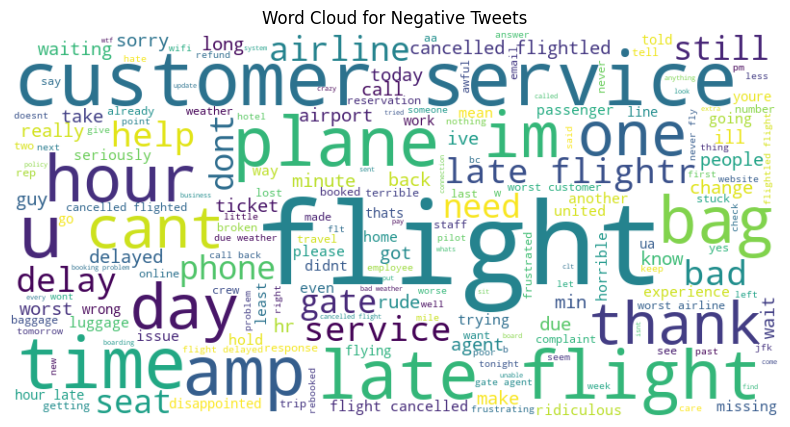

In [15]:
negative_tweets = tweets[tweets['sentiment'] == 'Negative']
negative_text = " ".join(negative_tweets['processed_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

For neutral

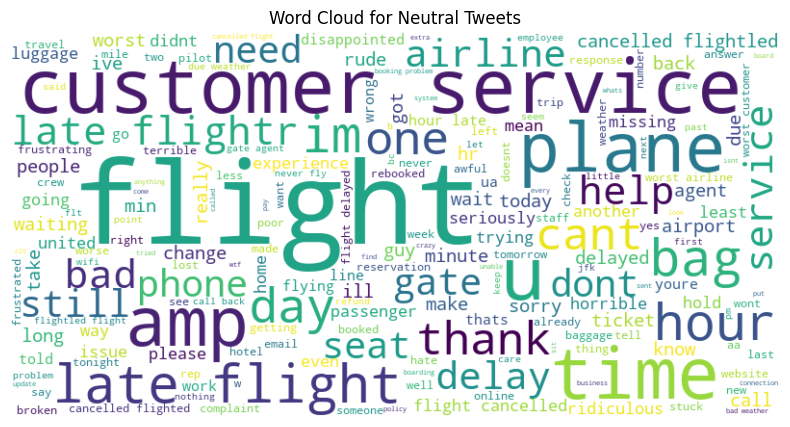

In [16]:
neutral_tweets = tweets[tweets['sentiment'] == 'Neutral']
neutral_text = " ".join(negative_tweets['processed_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Tweets')
plt.show()